In [6]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("D:\kaggle dataset\Amazon_Unlocked_Mobile.csv")   # adjust path if needed
print(df.head())
print(df.info())


<>:5: SyntaxWarning: invalid escape sequence '\k'
<>:5: SyntaxWarning: invalid escape sequence '\k'
C:\Users\91778\AppData\Local\Temp\ipykernel_11004\4015806907.py:5: SyntaxWarning: invalid escape sequence '\k'
  df = pd.read_csv("D:\kaggle dataset\Amazon_Unlocked_Mobile.csv")   # adjust path if needed


                                        Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   

   Rating                                            Reviews  Review Votes  
0       5  I feel so LUCKY to have found this used (phone...           1.0  
1       4  nice phone, nice up grade from my pantach revu...           0.0  
2       5                                       Very pleased           0.0  
3       4  It works good but it goes slow sometimes but i...           0.0  
4       4  Great phone to replace my lost phone. The only...           0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data colu

In [7]:
df.describe()

,Price,Rating,Review Votes
count,407907.000000,413840.000000,401544.000000
mean,226.867155,3.819578,1.507237
std,273.006259,1.548216,9.163853
min,1.730000,1.000000,0.000000
25%,79.990000,3.000000,0.000000
50%,144.710000,5.000000,0.000000
75%,269.990000,5.000000,1.000000
max,2598.000000,5.000000,645.000000


In [8]:
df.columns.tolist()

['Product Name', 'Brand Name', 'Price', 'Rating', 'Reviews', 'Review Votes']

In [14]:
df.isnull().sum().sum()

np.int64(83380)

In [9]:
# Drop NA
df = df.dropna(subset=["Reviews", "Rating"])

# Quick look at rating distribution
print(df['Rating'].value_counts())


Rating
5    223575
1     72335
4     61373
3     31763
2     24724
Name: count, dtype: int64


In [ ]:
#Label Sentiment
def get_sentiment(rating):
    if rating <= 2:
        return "Negative"
    elif rating == 3:
        return "Neutral"
    else:
        return "Positive"

df["Sentiment"] = df["Rating"].apply(get_sentiment)
print(df["Sentiment"].value_counts())


Sentiment
Positive    284948
Negative     97059
Neutral      31763
Name: count, dtype: int64


In [ ]:
# Text Preprocessing
import re
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z]", " ", text)  # remove special chars
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

df["Clean_Review"] = df["Reviews"].apply(clean_text)

df


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91778\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Sentiment,Clean_Review
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,Positive,feel lucky found used phone us used hard phone...
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,Positive,nice phone nice grade pantach revue clean set ...
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,Positive,pleased
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,Positive,works good goes slow sometimes good phone love
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,Positive,great phone replace lost phone thing volume bu...
...,...,...,...,...,...,...,...,...
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0,Positive,another great deal great price
413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,Ok,0.0,Neutral,ok
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0,Positive,passes every drop test onto porcelain tile
413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,0.0,Neutral,returned meet needs seemed good selection others


In [ ]:
#Feature Extraction (Vectorization)
from sklearn.feature_extraction.text import HashingVectorizer

hv = HashingVectorizer(n_features=2000, alternate_sign=False)
X = hv.fit_transform(df["Clean_Review"])


In [ ]:
#Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
#model training
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8476689948522126
              precision    recall  f1-score   support

    Negative       0.76      0.80      0.78     19329
     Neutral       0.49      0.09      0.16      6352
    Positive       0.88      0.95      0.91     57073

    accuracy                           0.85     82754
   macro avg       0.71      0.61      0.62     82754
weighted avg       0.82      0.85      0.82     82754



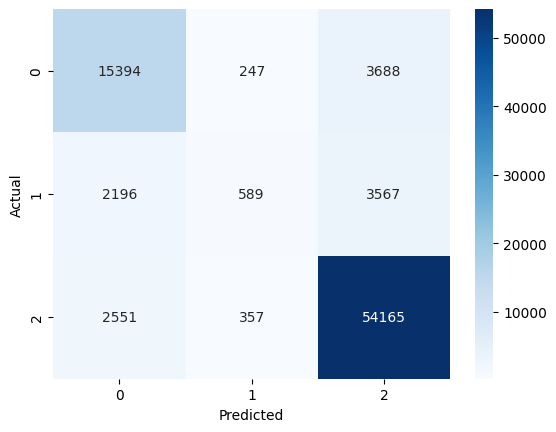

In [ ]:
# Evaluation

Check:

Accuracy

Precision, Recall, F1-score

Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


C:\Users\91778\AppData\Local\Temp\ipykernel_11004\3947813390.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sentiment", data=df, palette="Set2")


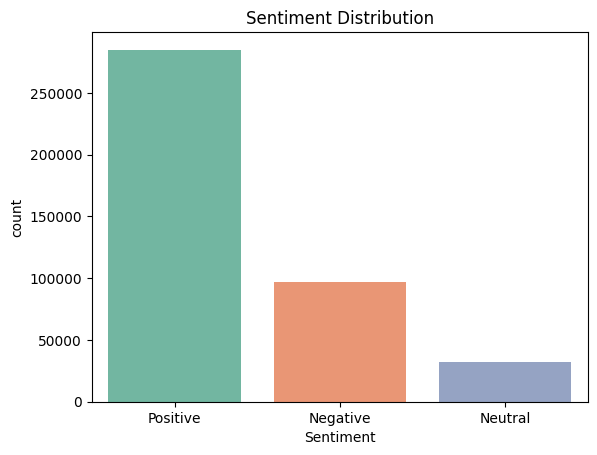

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Sentiment", data=df, palette="Set2")
plt.title("Sentiment Distribution")
plt.show()
